In [13]:
import matplotlib.pyplot as plt

import pandas as pd
from numpy import set_printoptions
import numpy

from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import auc
from sklearn.metrics import roc_curve

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# creating name column to recreate dataframe
names = ["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1"]

raw_df = pd.read_csv('dataR2.csv')

# dropping the target column
array = raw_df.drop("Classification",axis=1).values

# normalizing data to eliminate the effect of unit
array2 = preprocessing.scale(array)

# recreating the dataframe with normalize data and without the target column
x1_df = pd.DataFrame(data = array2, columns=names)


x1 = x1_df.values # array of attributes value
y1 = raw_df["Classification"].values # array of target value

# verifying the dimension of each array
print(x1.shape, y1.shape)

# splitting data in training and testing and verifyind dimensions
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# in the data, 1 is healthy patients, 2 is cancerous patients



(116, 9) (116,)
(69, 9) (69,)
(47, 9) (47,)


0.6382978723404256
[0.66666667 0.66666667 0.60869565 0.73913043 0.5       ]
------------- metrics ------------- 
              precision    recall  f1-score   support

           1       0.58      0.55      0.56        20
           2       0.68      0.70      0.69        27

    accuracy                           0.64        47
   macro avg       0.63      0.63      0.63        47
weighted avg       0.64      0.64      0.64        47

confusion matrix
[[11  9]
 [ 8 19]]
ROC curve
[4.888e-02 1.356e+00 1.662e+01 5.316e+00 5.119e+00 7.586e-03 1.693e+00
 2.669e+00 2.843e+00]
[[ 0.633 -0.332 -0.234  0.519]
 [-0.258  0.661  0.298 -0.149]
 [ 0.544  1.616  1.218 -1.419]
 [-0.258 -0.688 -0.548 -0.191]
 [-0.125  0.253  0.068  0.352]]


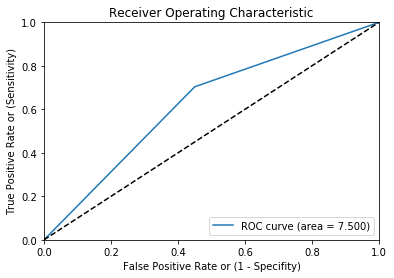

In [10]:
# doing logistic regression without crossfold validation
# https://machinelearningmastery.com/feature-selection-machine-learning-python/


logisticRegr = LogisticRegression()
result = logisticRegr.fit(X_train,y_train)

# evaluating the model
score = logisticRegr.score(X_test, y_test)
print(score)

# crossfold validation and logistic regression
scores = cross_val_score(logisticRegr, x1, y1, cv=5)
print(scores)

# predicting
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
y_pred = logisticRegr.predict(X_test)



print("------------- metrics ------------- ")
# sensitivity is recall for positives, specificity is recall for negative

report = classification_report(y_test, y_pred)
print(report)

print("confusion matrix")
conf = confusion_matrix(y_test, y_pred)
print(conf)

#ROC curve
print("ROC curve")
y_test_bin = [True if x == 2 else False for x in y_test]
y_pred_bin = [True if x == 2 else False for x in y_pred]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(y_test_bin, y_pred_bin)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")



test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X_train,y_train)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_train)
# summarize selected features
print(features[0:5,:])



0.6170212765957447
[0.66666667 0.66666667 0.73913043 0.73913043 0.5       ]
------------- metrics ------------- 
confusion matrix
[[11  9]
 [ 9 18]]
              precision    recall  f1-score   support

           1       0.55      0.55      0.55        20
           2       0.67      0.67      0.67        27

    accuracy                           0.62        47
   macro avg       0.61      0.61      0.61        47
weighted avg       0.62      0.62      0.62        47

ROC curve


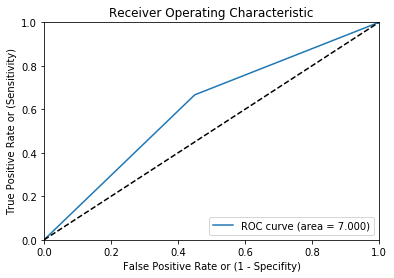

In [4]:
from sklearn import svm

model_svm = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print(model_svm.score(X_test, y_test))

# crossfold validation and SVM
scores = cross_val_score(model_svm, x1, y1, cv=5)
print(scores)

y_pred = model_svm.predict(X_test)

print("------------- metrics ------------- ")
print("confusion matrix")
conf = confusion_matrix(y_test, y_pred)
print(conf)

report = classification_report(y_test, y_pred)
print(report)


#ROC curve
print("ROC curve")
y_test_bin = [True if x == 2 else False for x in y_test]
y_pred_bin = [True if x == 2 else False for x in y_pred]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(y_test_bin, y_pred_bin)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


0.7021276595744681
[0.79166667 0.66666667 0.60869565 0.65217391 0.36363636]
------------- metrics ------------- 
confusion matrix :
{1: 20, 2: 27}
[[14  6]
 [ 8 19]]
              precision    recall  f1-score   support

           1       0.64      0.70      0.67        20
           2       0.76      0.70      0.73        27

    accuracy                           0.70        47
   macro avg       0.70      0.70      0.70        47
weighted avg       0.71      0.70      0.70        47

ROC curve


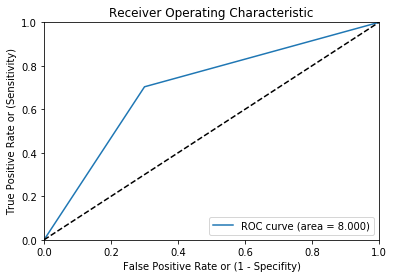

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)
print(model_knn.score(X_test, y_test))

scores = cross_val_score(model_knn, x1, y1, cv=5)
print(scores)

y_pred = model_knn.predict(X_test)

print("------------- metrics ------------- ")
print("confusion matrix :")
print(conf)
report = classification_report(y_test, y_pred)
print(report)



#ROC curve
print("ROC curve")

# transform data into binary results
y_test_bin = [True if x == 2 else False for x in y_test]
y_pred_bin = [True if x == 2 else False for x in y_pred]

# calculatinc ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(y_test_bin, y_pred_bin)

# plotting ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

0.6170212765957447
[0.5        0.5        0.73913043 0.56521739 0.54545455]
------------- metrics ------------- 
              precision    recall  f1-score   support

           1       0.54      0.75      0.63        20
           2       0.74      0.52      0.61        27

    accuracy                           0.62        47
   macro avg       0.64      0.63      0.62        47
weighted avg       0.65      0.62      0.62        47

confusion matrix
[[15  5]
 [13 14]]
ROC curve


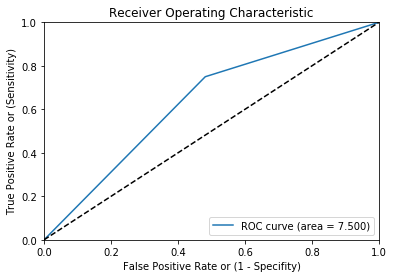

In [17]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
print(model_dt.score(X_test, y_test))

scores = cross_val_score(model_dt, x1, y1, cv=5)
print(scores)

y_pred = model_dt.predict(X_test)

print("------------- metrics ------------- ")
report = classification_report(y_test, y_pred)
print(report)

print("confusion matrix")
conf = confusion_matrix(y_test, y_pred)
print(conf)
#ROC curve
print("ROC curve")
y_test_bin = [True if x == 2 else False for x in y_test]
y_pred_bin = [True if x == 2 else False for x in y_pred]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(y_test_bin, y_pred_bin)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


0.574468085106383
[0.75       0.33333333 0.69565217 0.56521739 0.63636364]
------------- metrics ------------- 
              precision    recall  f1-score   support

           1       0.50      0.50      0.50        20
           2       0.63      0.63      0.63        27

    accuracy                           0.57        47
   macro avg       0.56      0.56      0.56        47
weighted avg       0.57      0.57      0.57        47

confusion matrix
[[10 10]
 [10 17]]
ROC curve


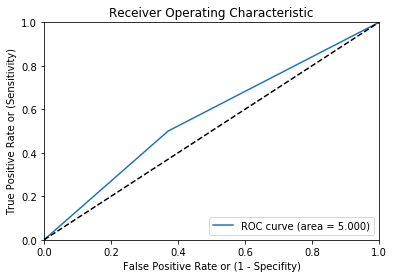

In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train, y_train)
print(model_qda.score(X_test, y_test))

scores = cross_val_score(model_qda, x1, y1, cv=5)
print(scores)


y_pred = model_qda.predict(X_test)

print("------------- metrics ------------- ")
report = classification_report(y_test, y_pred)
print(report)

print("confusion matrix")
conf = confusion_matrix(y_test, y_pred)
print(conf)

#ROC curve
print("ROC curve")
y_test_bin = [True if x == 2 else False for x in y_test]
y_pred_bin = [True if x == 2 else False for x in y_pred]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(y_test_bin, y_pred_bin)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier()

# fitting the model to the data
model_dt.fit(X_train, y_train)

# printing the training and testing accuracy
print("training accuracy : " + str(model_dt.score(X_train, y_train)))
print("testing accuracy : " + str(model_dt.score(X_test, y_test)))

# calculating the cross validation accuracy
scores = cross_val_score(model_dt, x1, y1, cv=5)
print("cross fold validation accuracy : " + str(scores))
print("mean accuracy : " + str(scores.mean()))

y_pred = model_dt.predict(X_test)

print("------------- metrics ------------- ")
report = classification_report(y_test, y_pred)
print(report)

print("confusion matrix")
conf = confusion_matrix(y_test, y_pred)
print(conf)
#ROC curve
print("ROC curve")
y_test_bin = [True if x == 2 else False for x in y_test]
y_pred_bin = [True if x == 2 else False for x in y_pred]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(y_test_bin, y_pred_bin)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
